In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [ ]:
!pip install inference

impor dataset roboflow


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("kamatis-disease-detection").project("kamatis_detection")
version = project.version(5)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-masa-siap-panen-tanaman-sayuran-3 in yolov11:: 100%|██████████| 1208/1208 [00:00<00:00, 2391.61it/s]


run


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 131MB/s] 
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1732356004.463e387bdcf3.1406.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


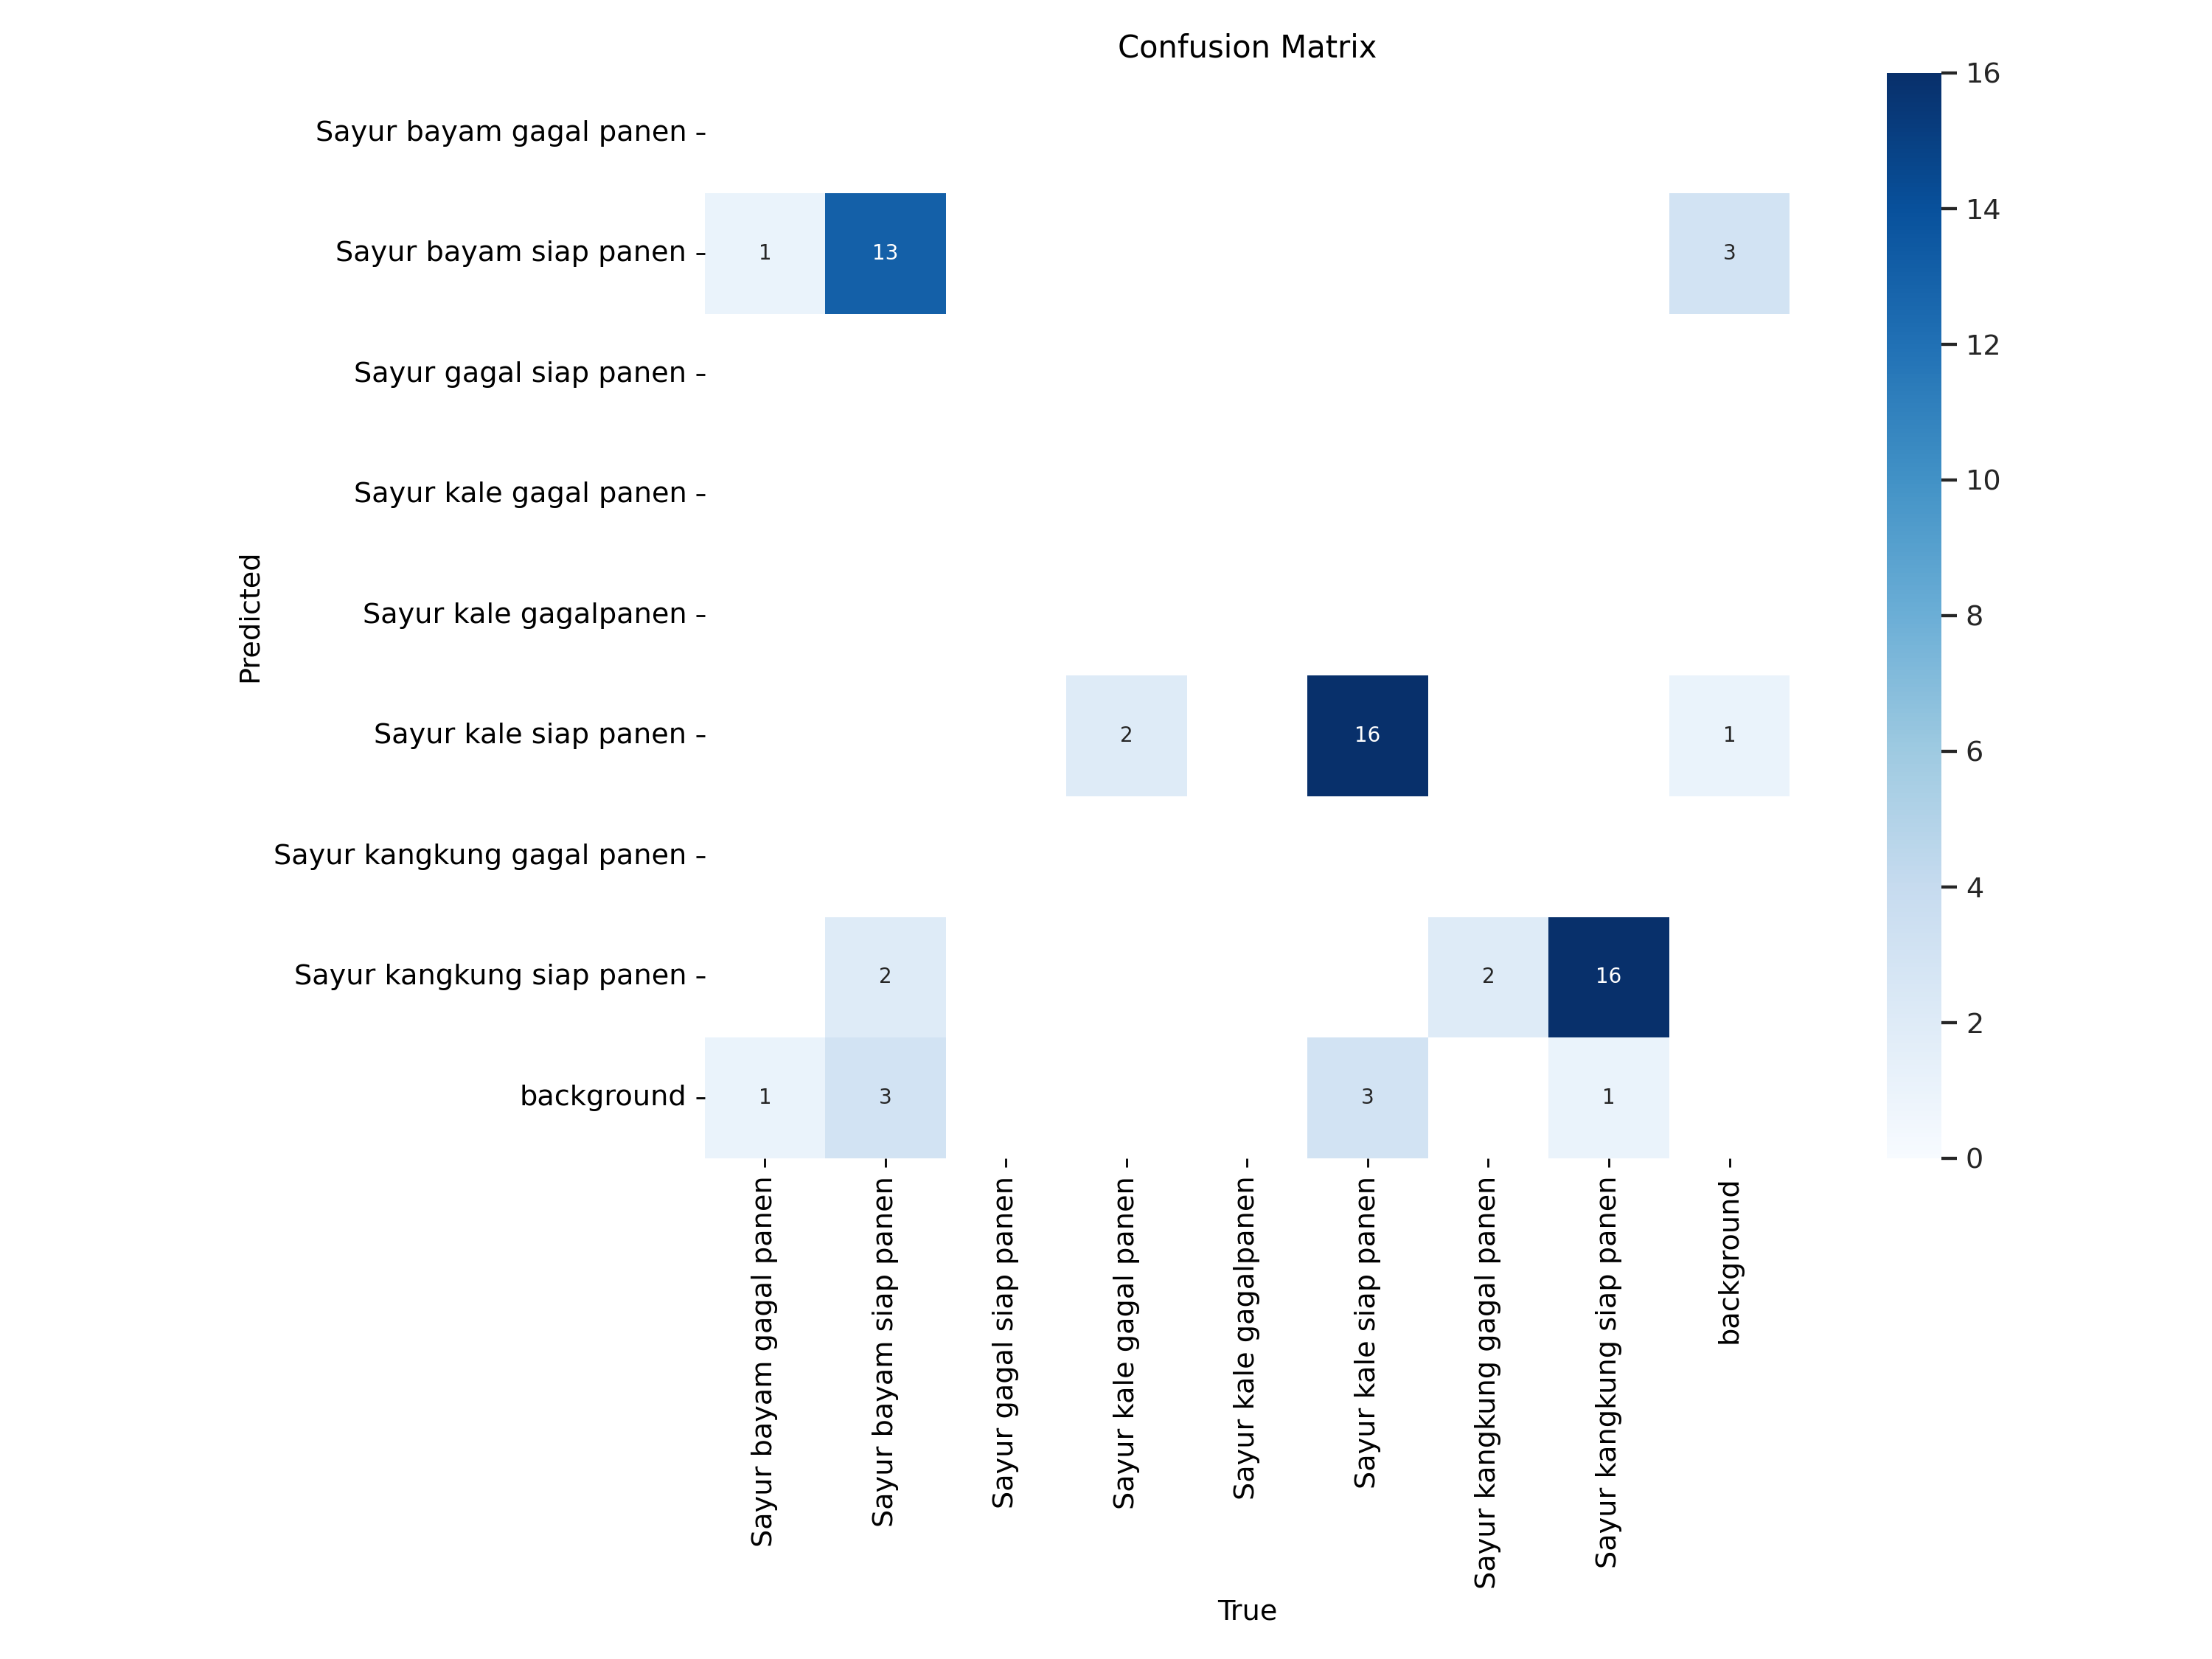

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

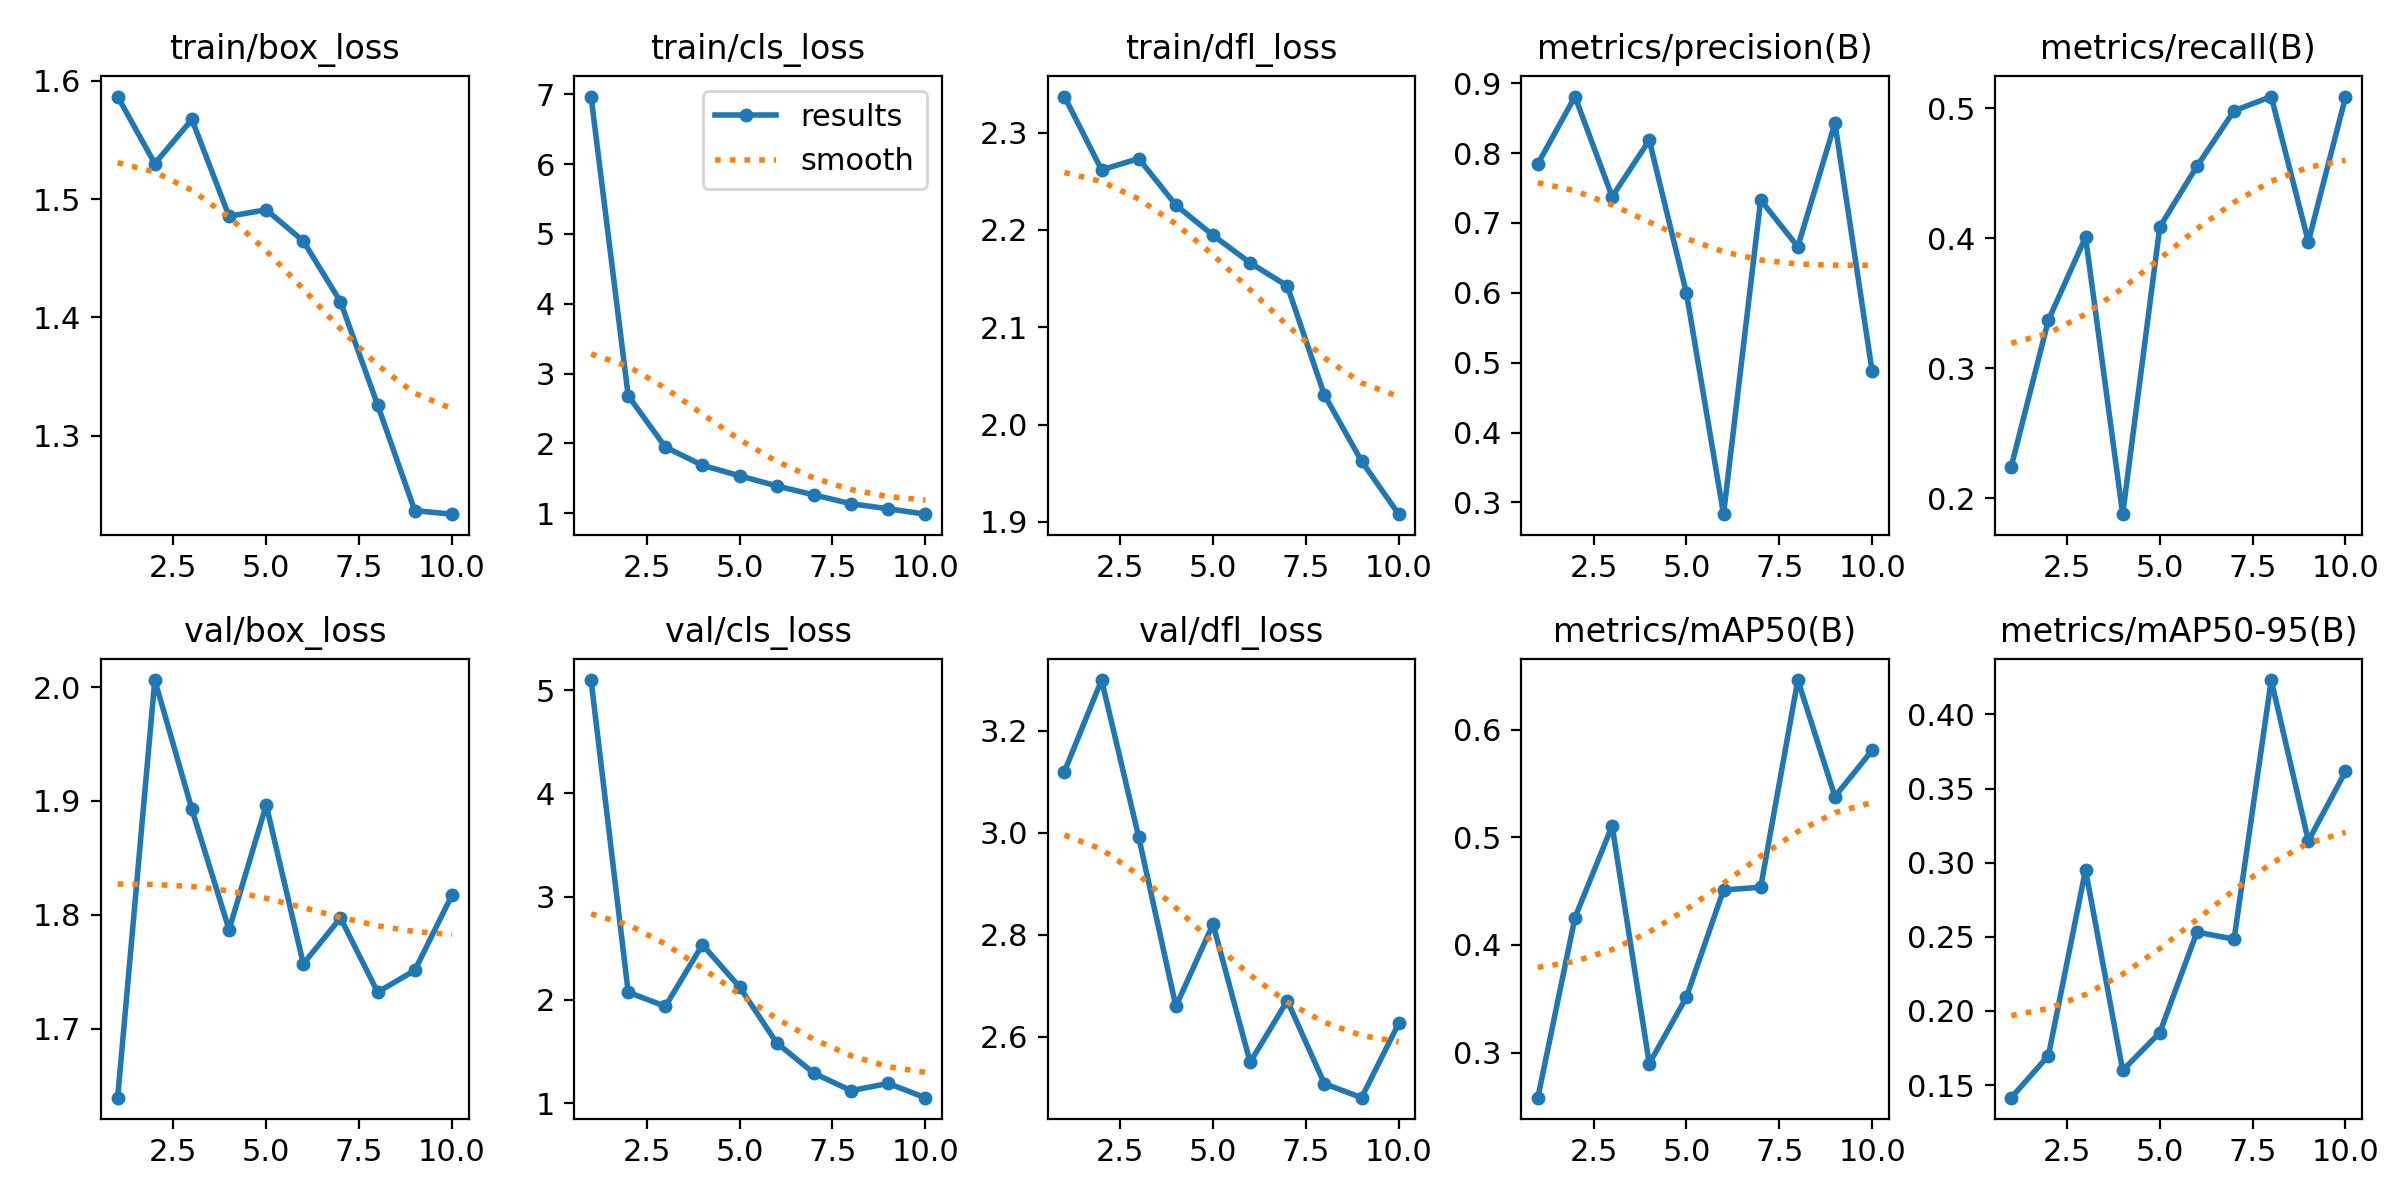

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

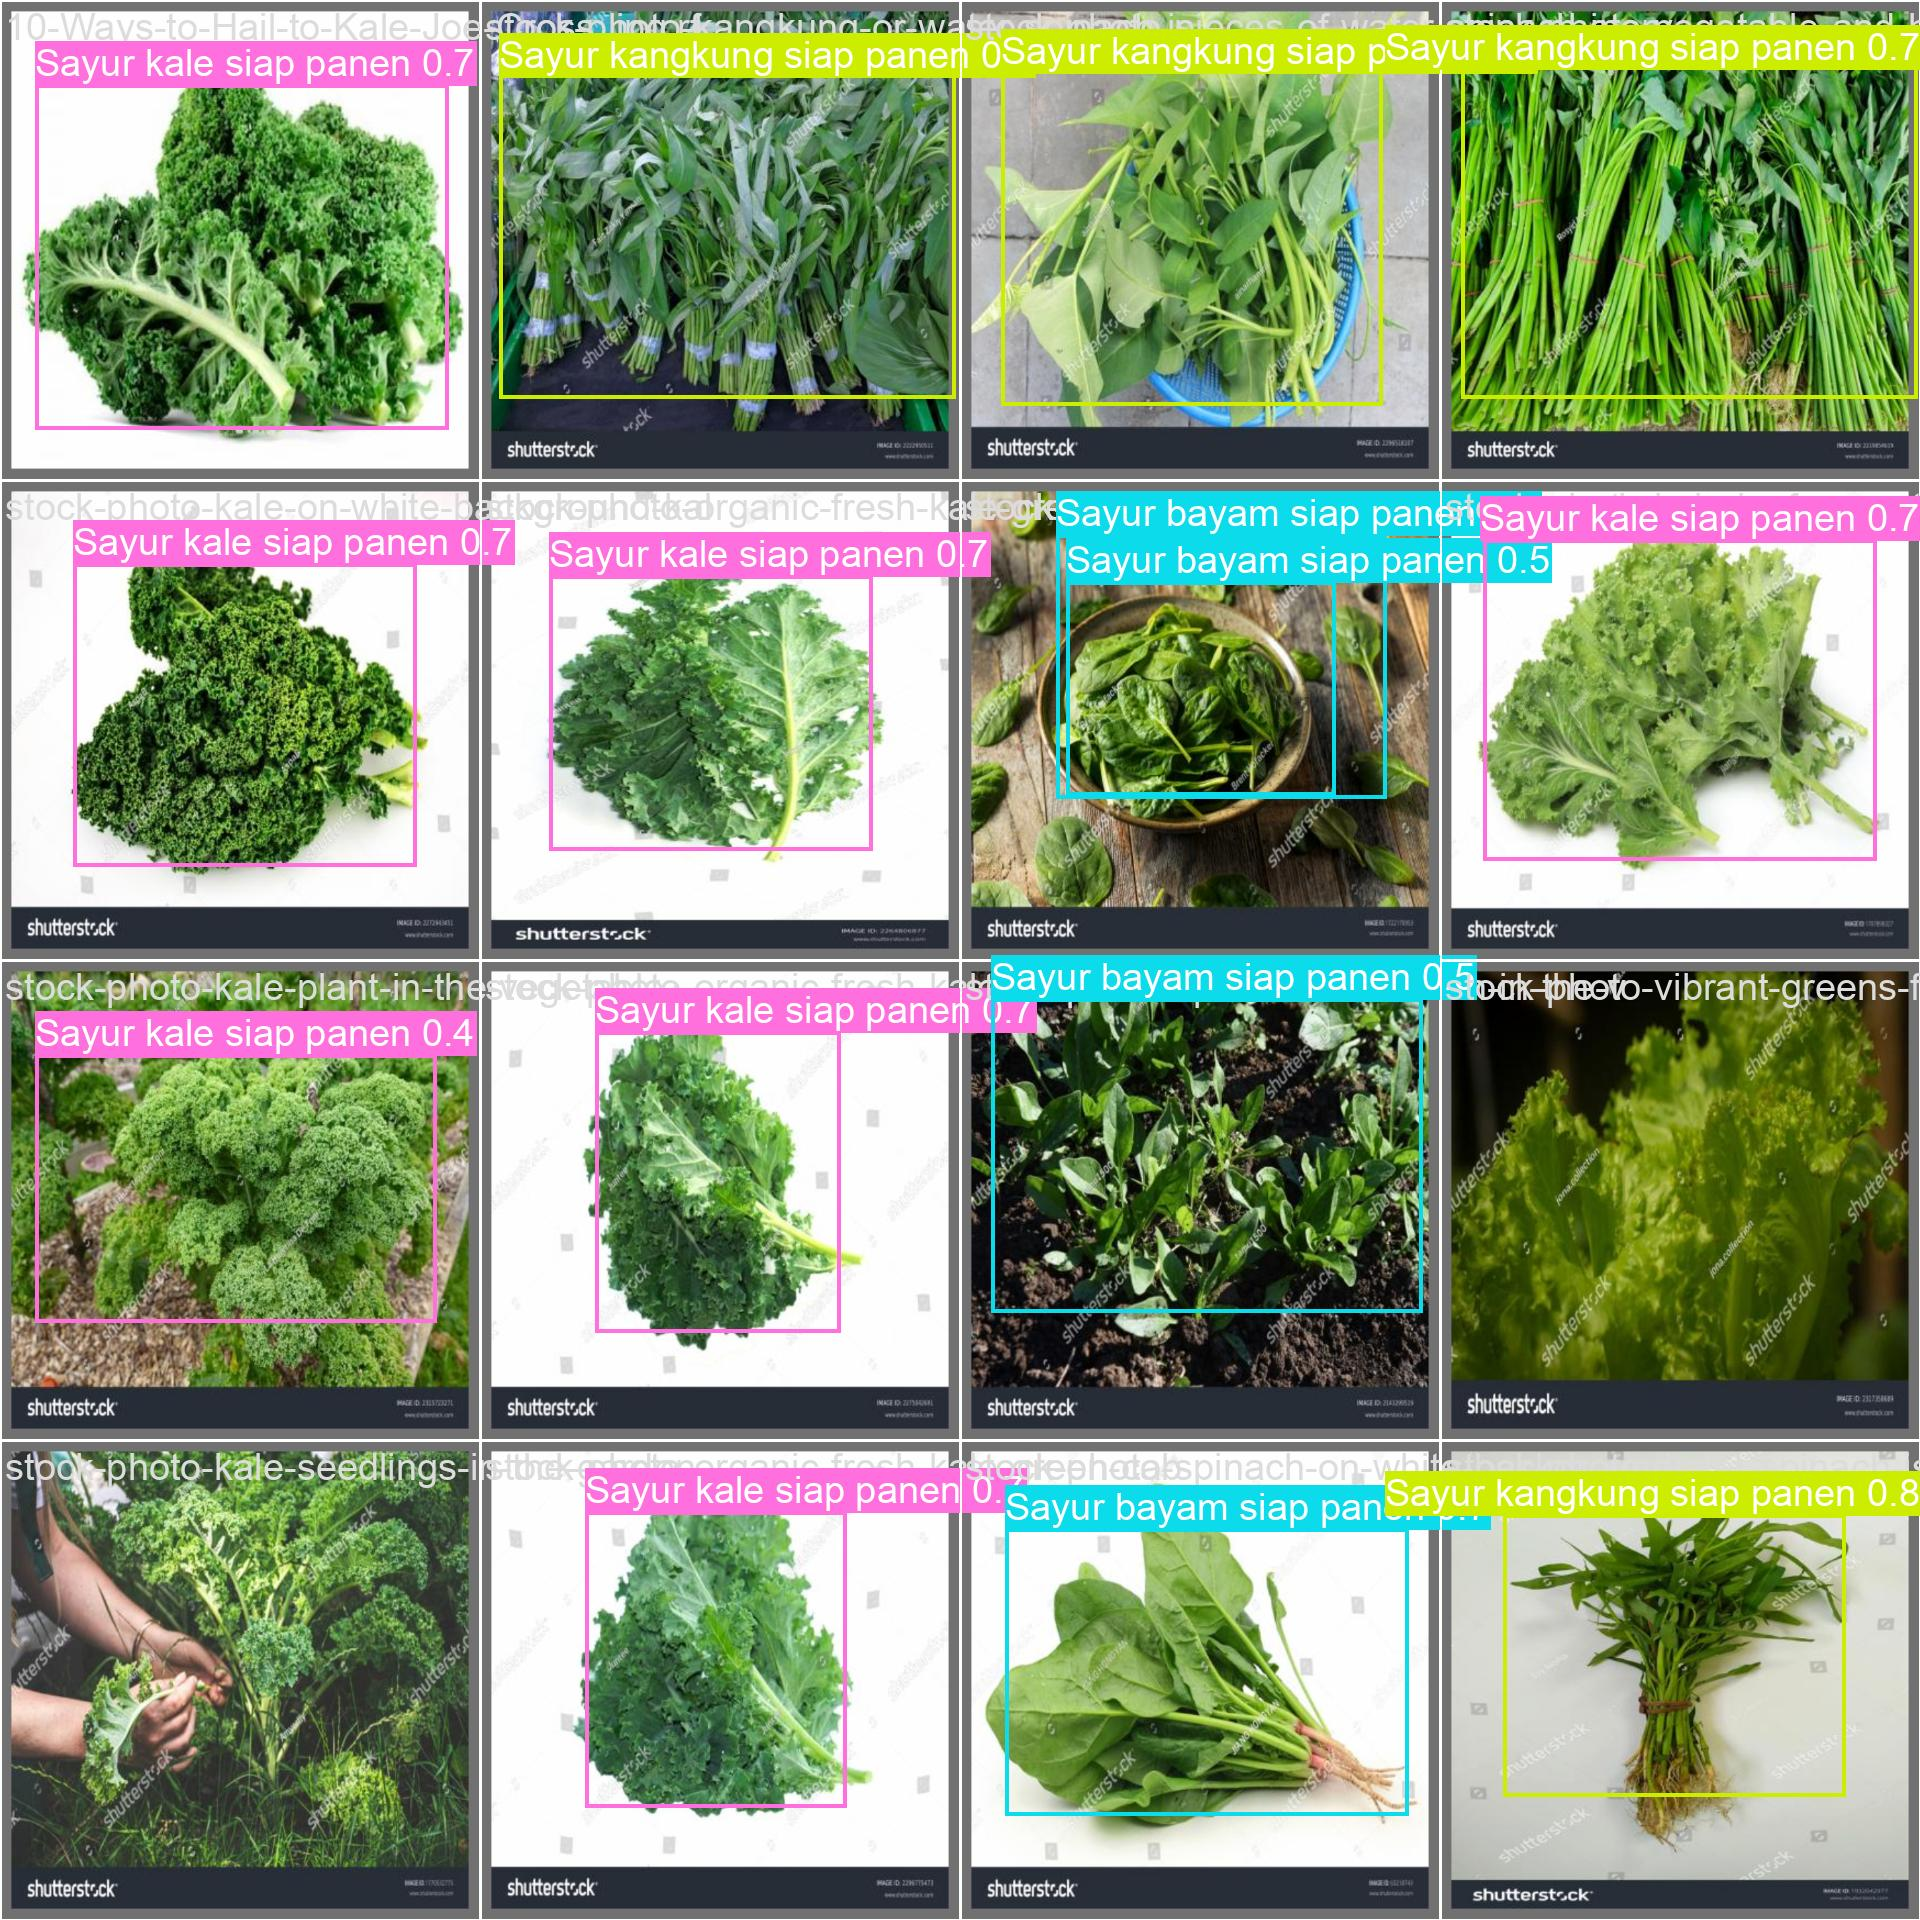

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.47it/s]
                   all         60         60      0.666      0.509      0.644      0.423
Sayur bayam gagal panen          2          2          1          0      0.496      0.446
Sayur bayam siap panen         18         18      0.429      0.667      0.484      0.161
Sayur kale gagal panen          2          2      0.197        0.5      0.586      0.392
 Sayur kale siap panen         19         19       0.67      0.947      0.875      0.553
Sayur kangkung gagal panen          2          2          1          0      0.578      0.423
Sayur kang

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/28 /content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/test/images/200-Thai-Water-Convolvulus-seeds-Morning-glory-Water-spinach-Water-morning-glory-Swamp-cabbage-seeds_jpg.rf.e90ff47dffbc2524b1948d605b6b1f79.jpg: 640x640 1 Sayur kangkung siap panen, 15.6ms
image 2/28 /content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/test/images/How-to-Cook-Fresh-Spinach-1-_jpg.rf.3db2a79fda7591eb85995f23612541c5.jpg: 640x640 (no detections), 15.6ms
image 3/28 /content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/test/images/How-to-saute-spinach_jpg.rf.7eb4eba91cd5f56979c0f2e0460dfa3e.jpg: 640x640 (no detections), 15.5ms
image 4/28 /content/datasets/Deteksi-masa-siap-panen-tanaman-sayuran-3/test/images/Water-Spinach-Bamboo-Leaf-20-seeds-seeds-_jpg.rf.d34979874cad504cfc47ba6ac020eef1.jpg: 640x640 1 Sayur kang

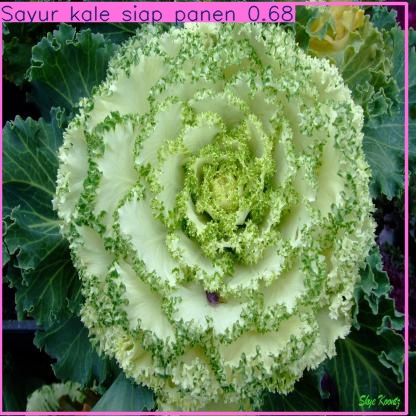

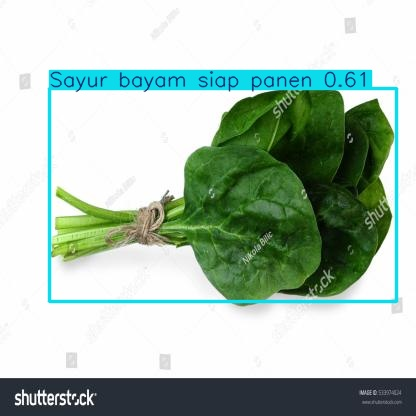

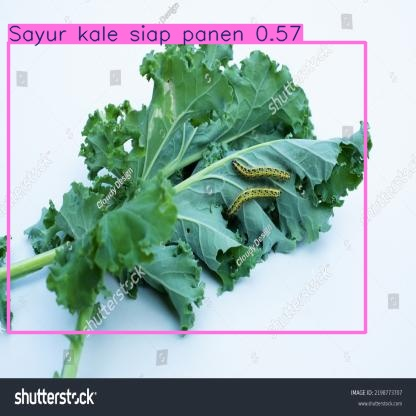

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

download the content


In [ ]:
%cd /content/

/content


In [ ]:
!zip -r datasets.zip datasets


  adding: datasets/ (stored 0%)
  adding: datasets/collard-bokchoy-2/ (stored 0%)
  adding: datasets/collard-bokchoy-2/valid/ (stored 0%)
  adding: datasets/collard-bokchoy-2/valid/images/ (stored 0%)
  adding: datasets/collard-bokchoy-2/valid/images/14_jpg.rf.b85e3afd1bf4c324de53ea8abcf56362.jpg (deflated 0%)
  adding: datasets/collard-bokchoy-2/valid/images/45_jpg.rf.62204f1dad409ace92f903d6019a53e7.jpg (deflated 13%)
  adding: datasets/collard-bokchoy-2/valid/images/54_jpg.rf.2dbb7cef449cb72361eecfc109a7cacf.jpg (deflated 0%)
  adding: datasets/collard-bokchoy-2/valid/images/32_jpg.rf.8e5a38805fcc2781e7a9a73421011f7f.jpg (deflated 12%)
  adding: datasets/collard-bokchoy-2/valid/images/43_jpg.rf.e42f3b8db4f540de1c80305e447a09e3.jpg (deflated 14%)
  adding: datasets/collard-bokchoy-2/valid/images/31_jpg.rf.f7139e0c1532ffadf3900ff79123e061.jpg (deflated 0%)
  adding: datasets/collard-bokchoy-2/valid/images/43_jpg.rf.768db9ce9ec1b605cfd1eac04e65a5e0.jpg (deflated 6%)
  adding: datasets/

In [ ]:
!zip -r runs.zip runs


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/63_jpg.rf.a8a93ae778976840ea4c1d8d821818d3.jpg (deflated 4%)
  adding: runs/detect/predict/33_jpg.rf.fb36e2058c6d54fe8f193a1510b432c8.jpg (deflated 4%)
  adding: runs/detect/predict/38_jpg.rf.70fbb79d7cefe8d4ab94ccc1c1241331.jpg (deflated 4%)
  adding: runs/detect/predict/7_jpg.rf.ca74cba3cbd2d2e16d26d726a6e13ec4.jpg (deflated 15%)
  adding: runs/detect/predict/68_jpg.rf.60164a8d69779684b01590c65bc39885.jpg (deflated 12%)
  adding: runs/detect/predict/42_jpg.rf.70f7d74d37e1b749f506079093e6eecd.jpg (deflated 5%)
  adding: runs/detect/predict/25_jpg.rf.437b1cceaff3ec5ca6767677e2077e25.jpg (deflated 6%)
  adding: runs/detect/predict/40_jpg.rf.0f3d80de60fca127e87e2d1d17ef7f12.jpg (deflated 6%)
  adding: runs/detect/predict/34_jpg.rf.4ffdc3087dd66e281154efd1a68e678c.jpg (deflated 11%)
  adding: runs/detect/predict/36_jpg.rf.5f1d560b72c875e97da2abf8a456117c.